In [1]:
import test_config as cfg
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import os, os.path
import pickle
import io

import skimage
import skimage.io, skimage.transform, skimage.filters
import scipy.ndimage

import sys
sys.path.append(r'../src/')

import importlib
import transform
import filters
import local_radon
import skew_line
importlib.reload(transform)
importlib.reload(filters)
importlib.reload(local_radon)
importlib.reload(skew_line)

<module 'skew_line' from '../src\\skew_line.py'>

D:/Data/bujo_sample\test_rot30.jpg


c:\anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:69: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


Text angles is 66.84647302904565
Text line delta is 8
Wall time: 5.01 s


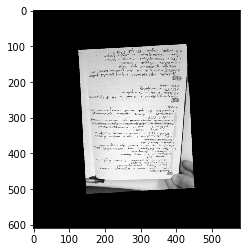

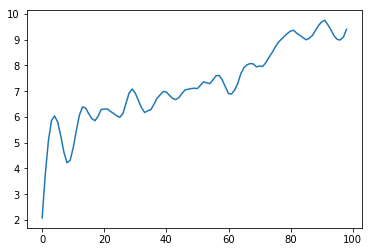

In [20]:
%%time
src_fname = os.path.join(cfg.sample_path, os.listdir(cfg.sample_path)[10])
print(src_fname)

src = skimage.io.imread(src_fname, as_grey=True)
text_angle = transform.get_text_angle(skimage.transform.rescale(src, scale=0.05))
print('Text angles is {}'.format(text_angle[0][0]))

src3 = skimage.transform.rotate(skimage.transform.rescale(src, scale=0.1), -90.0-text_angle[0][0], resize=True)
srcr = skimage.transform.rotate(skimage.transform.rescale(src, scale=0.5), -90.0-text_angle[0][0], resize=True)

text_line_delta, text_line_deltas = transform.get_text_line_delta(src3)

plt.figure()
plt.imshow(src3, cmap='gray')

plt.figure()
plt.plot(text_line_deltas)
print('Text line delta is {}'.format(text_line_delta))

In [8]:
src3.shape, text_line_delta, text_line_delta//2

((403, 302), 9, 4)

In [7]:
src3[30, :20]

array([ 0.80981529,  0.81256475,  0.80501549,  0.80906832,  0.80894249,
        0.8100336 ,  0.8098737 ,  0.80757529,  0.80803523,  0.81149686,
        0.8123706 ,  0.81216034,  0.81172573,  0.81480875,  0.8134223 ,
        0.81188291,  0.81191674,  0.81436662,  0.81199673,  0.81149686])

In [10]:
tmp1 = filters.variance_percentile_h(src3, (text_line_delta//2, text_line_delta//2), 50)

In [11]:
tmp1.shape

(400, 297)

In [14]:
tmp1[30,:20]

array([ 0.00236484,  0.00242817,  0.00217014,  0.00132793,  0.00162933,
        0.00159162,  0.00169416,  0.00190307,  0.00203341,  0.00191384,
        0.00232722,  0.00242703,  0.00191136,  0.00224414,  0.00205632,
        0.00207439,  0.00221597,  0.00185428,  0.00223705,  0.00210292])

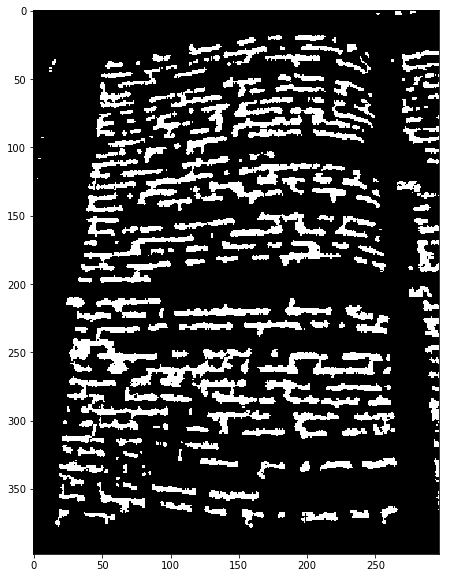

In [17]:
src4 = transform.filter_variance(src3, (text_line_delta//2, text_line_delta//2), 50, 50)
text_cutoff = np.percentile(src4, 90)/2
plt.figure(figsize=(10,10))
plt.imshow(src4 > text_cutoff, cmap='gray')